###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3618,3956,4128,3355,3736,4437,5082,3206.0,4537.0,4172.0
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,77961,82289,86943,90638,94858,99688,105159,108686.0,113628.0,118292.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30915,33540,36115,38598,40431,42727,44946,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806,841,890,944,997,1054,1113,1188.0,1275.0,1356.0
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,46240,47908,49938,51096,53430,55907,59100,21325.0,21605.0,21305.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,346,372,526,340,484,393,389,321.0,405.0,492.0
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3964,4328,4654,3695,4220,4830,5471,3527.0,4942.0,4664.0


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

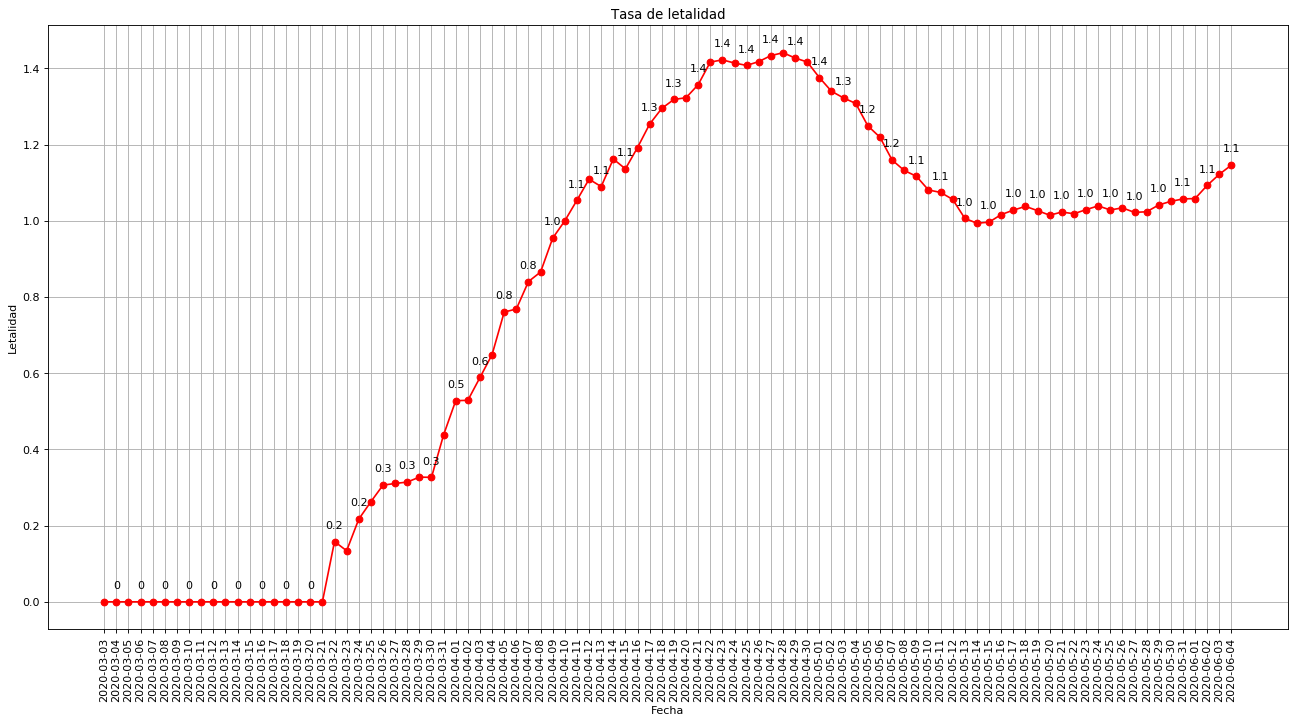

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2020-05-31,619,2361,2510,218,628,3167,80504,785,1297,1257,1979,2071,356,863,17,1056,99688
90,2020-06-01,636,2526,2585,232,668,3348,85239,813,1341,1290,2070,2111,363,863,17,1056,105159
91,2020-06-02,654,2594,2649,236,687,3595,88194,843,1381,1290,2082,2141,368,894,18,1060,108686
92,2020-06-03,701,2682,2716,242,718,3769,92191,931,1595,1329,2215,2173,372,913,18,1063,113628


In [9]:
date = str(datetime.date.today())
date =  '2020-06-04'

In [10]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [11]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [16]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
data_fallecidos_region
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [17]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [18]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,736,8,1.086957
1,Tarapacá,2810,28,0.996441
2,Antofagasta,2862,38,1.327743
3,Atacama,258,0,0.000000
4,Coquimbo,772,4,0.518135
5,Valparaíso,4017,78,1.941748
6,Metropolitana,95890,1034,1.078319
7,O’Higgins,967,21,2.171665
8,Maule,1732,21,1.212471
9,Ñuble,1372,24,1.749271


In [19]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

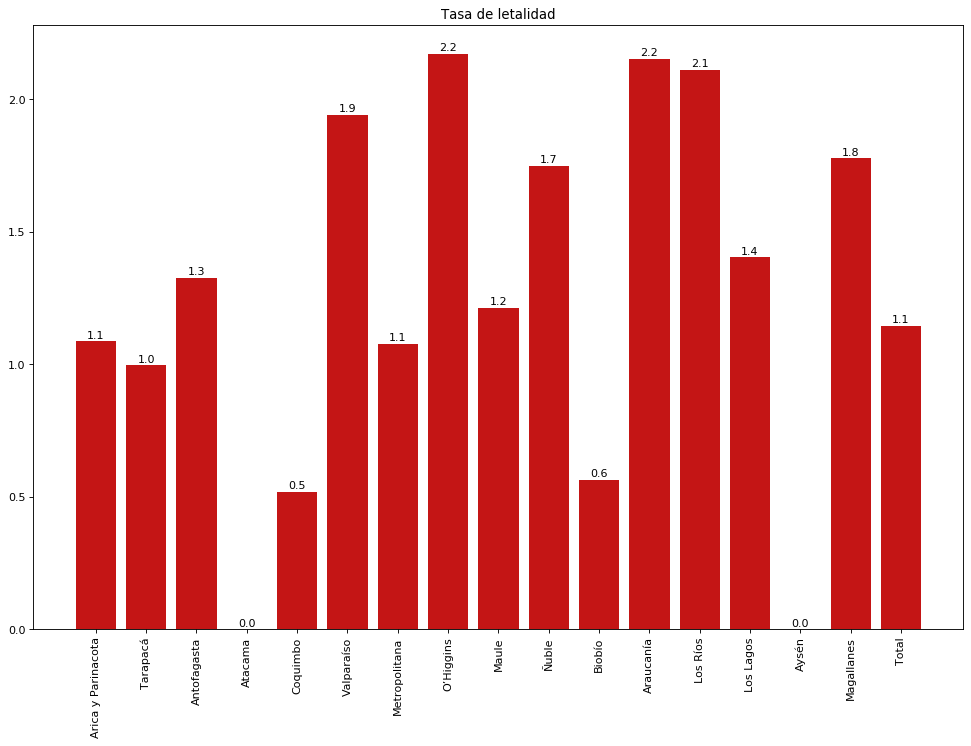

In [20]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()